# The Tiatanic

In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data from seaborn
titanic = sns.load_dataset('titanic')
print(display(titanic.head(10)))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


None


In [3]:
titanic[(titanic['embarked']=='S') &(titanic['embark_town']!='Southhampton')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [4]:
len(titanic['embarked']=='S')

891

In [5]:
len(titanic['embark_town']=='Southhampton')

891

In [6]:
# Print shape of dataset
titanic.shape

(891, 15)

In [7]:
#Get Stat
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Number of Survivor
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

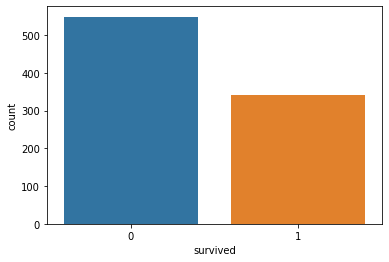

In [9]:
#Visualise countplot
sns.countplot(titanic['survived'])

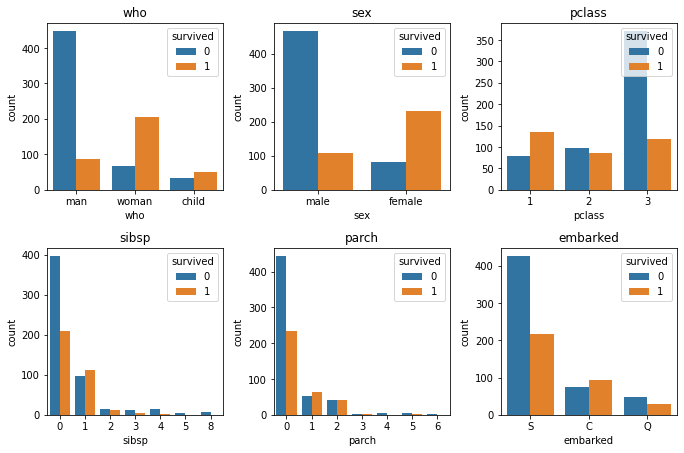

In [10]:
#Visualise the number of survivors with respect to other features
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

#Creating subplots and figure size of each graph
fig,axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.2, n_rows * 3.2))

for r in range(0, n_rows):
    for c in range(0,n_cols):

        i = r*n_cols + c 
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc = 'upper right')

plt.tight_layout()
plt.savefig('Titanalysis.jpg')

In [11]:
# Survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [12]:
# Survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

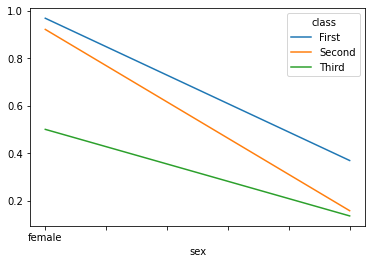

In [13]:
# Survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

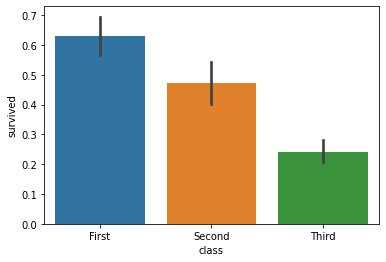

In [14]:
# The survival rate of each class
sns.barplot(x='class', y='survived', data=titanic)

In [15]:
 # Look at the survival rate by sex, age, class
 age = pd.cut(titanic['age'], [0,18,80])

titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

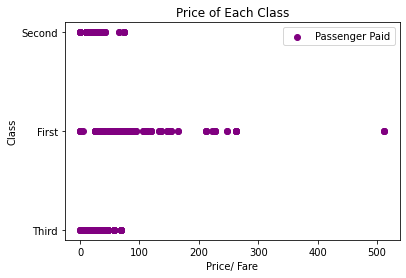

In [16]:
#Plot price paid for each class
plt.scatter(titanic['fare'], titanic['class'], color='purple', label = 'Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price/ Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [17]:
# Count th empty values
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
# Get the percentage missing values
percentage = (titanic.isna().sum()/titanic.shape[0])*100
print(percentage)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [19]:
#Count of each value in each column
for val in titanic.columns:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [20]:
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male'], axis = 1)

titanic = titanic.dropna(subset=['embarked', 'age'])

In [21]:
titanic.shape

(712, 9)

In [22]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
who          object
dtype: object

In [23]:
# Print unique values in column

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [24]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
#Encoding the columns

titanic.iloc[:,2] = Le.fit_transform(titanic.iloc[:, 2].values)
titanic.iloc[:,7] = Le.fit_transform(titanic.iloc[:, 7].values)


In [25]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [26]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
who          object
dtype: object

In [27]:
X = titanic.iloc[:, 1:8].values
y = titanic.iloc[:, 0].values

In [28]:
#Splitting our data into training and testing split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
# Creating Function for machine learning
def models(X_train, y_train):


    #Use logistic regressiom
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)


    #Use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, y_train)


    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, y_train)

    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, y_train)

    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    guass = GaussianNB()
    guass.fit(X_train, y_train)


    #Use Decision
    from sklearn.tree import DecisionTreeClassifier
    Tree = DecisionTreeClassifier(criterion='entropy',  random_state=0)
    Tree.fit(X_train, y_train)

    #Use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)


    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, y_train))
    print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, y_train))
    print('[2]SVC LinearTraining Accuracy: ', svc_lin.score(X_train, y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, y_train))
    print('[4]Gaussian NB Training Accuracy: ', guass.score(X_train, y_train))
    print('[5]Decision Tree Training Accuracy: ', Tree.score(X_train, y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, y_train))

    return log, knn, svc_lin, svc_rbf, guass, Tree, forest

In [31]:
model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy:  0.8031634446397188
[1]K Neighbors Training Accuracy:  0.789103690685413
[2]SVC LinearTraining Accuracy:  0.7768014059753954
[3]SVC RBF Training Accuracy:  0.6854130052724078
[4]Gaussian NB Training Accuracy:  0.8031634446397188
[5]Decision Tree Training Accuracy:  0.9929701230228472
[6]Random Forest Training Accuracy:  0.9753954305799648


In [32]:
# Show the confusion matrix and accuracy on test data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))


    #Extract TN, FP, FN, TP

    TN, FP, FN, TP = cm.ravel()

    test_score = (TP + TN)/(TP + TN + FN + FP)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))

[[ 0 82]
 [ 0 61]]
Model[0] Testing Accuracy = "0.42657342657342656"
[[ 0 82]
 [ 0 61]]
Model[1] Testing Accuracy = "0.42657342657342656"
[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"
[[82  0]
 [61  0]]
Model[3] Testing Accuracy = "0.5734265734265734"
[[ 4 78]
 [ 0 61]]
Model[4] Testing Accuracy = "0.45454545454545453"
[[70 12]
 [18 43]]
Model[5] Testing Accuracy = "0.7902097902097902"
[[22 60]
 [ 8 53]]
Model[6] Testing Accuracy = "0.5244755244755245"


In [33]:
#Get feature importance
Tree = model[5]
importances = pd.DataFrame({'feature':titanic.iloc[:,1:8].columns, 'importance':np.round(Tree.feature_importances_, 3)})

importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
age,0.268
fare,0.265
sex,0.216
pclass,0.136
sibsp,0.067
embarked,0.032
parch,0.016


<AxesSubplot:xlabel='feature'>

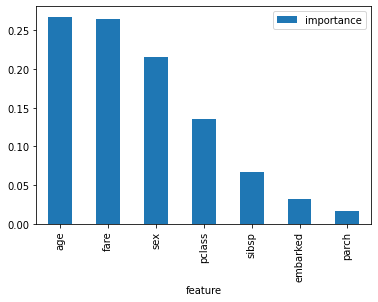

In [34]:
importances.plot.bar()

In [35]:
# Print prediction
pred = model[5].predict(X_test)
print(pred)

print()

# Print actual values
print(y_test)

[1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


## Model Deployment

In [36]:
import pickle 

In [37]:
filename = 'Titanic.pkl'
pickle.dump(model[5], open(filename, 'wb'))

In [41]:
!pip install flask

In [ ]:
#Home Page


In [38]:
bin = np.arange(0, 1200000, 5000)
for z in zip(bin[:-1], bin[1:]):
    print(z)

(0, 5000)
(5000, 10000)
(10000, 15000)
(15000, 20000)
(20000, 25000)
(25000, 30000)
(30000, 35000)
(35000, 40000)
(40000, 45000)
(45000, 50000)
(50000, 55000)
(55000, 60000)
(60000, 65000)
(65000, 70000)
(70000, 75000)
(75000, 80000)
(80000, 85000)
(85000, 90000)
(90000, 95000)
(95000, 100000)
(100000, 105000)
(105000, 110000)
(110000, 115000)
(115000, 120000)
(120000, 125000)
(125000, 130000)
(130000, 135000)
(135000, 140000)
(140000, 145000)
(145000, 150000)
(150000, 155000)
(155000, 160000)
(160000, 165000)
(165000, 170000)
(170000, 175000)
(175000, 180000)
(180000, 185000)
(185000, 190000)
(190000, 195000)
(195000, 200000)
(200000, 205000)
(205000, 210000)
(210000, 215000)
(215000, 220000)
(220000, 225000)
(225000, 230000)
(230000, 235000)
(235000, 240000)
(240000, 245000)
(245000, 250000)
(250000, 255000)
(255000, 260000)
(260000, 265000)
(265000, 270000)
(270000, 275000)
(275000, 280000)
(280000, 285000)
(285000, 290000)
(290000, 295000)
(295000, 300000)
(300000, 305000)
(305000,